# 4. Funções de Sobrevivência Comparadas

In [1]:
# directoria de trabalho
setwd('')
# chamar pacotes survival, DBI (para ligar base-de-dados), ggplot2 (graficos)
library(survival)
library(DBI)
library(ggplot2)

## 4.1. Modelo "Casa" e Odds diferentes

In [2]:
#recolher dados
foot <- dbConnect(RSQLite::SQLite(), "foot.db")
data <- dbGetQuery(foot, 'SELECT tempo, (cens + equip)%2 as cens, odds FROM goal_1')
dbDisconnect(foot)
rm(foot)

In [3]:
#modelo final para "casa"
ligas <- c(rep(1,1347),rep(1,1781),rep(3,1443),rep(1,1808),rep(5,1788),rep(1,1836))
casa <- data$tempo
cens1 <- data$cens
odds1 <- as.numeric(data$odds)
rm(data)
#ajustar
fit_casa <- coxph(Surv(casa, cens1) ~ factor(ligas) + odds1, method="breslow")
beta_ligas <- fit_casa$coefficients[1]
beta_ligas
beta_odds_casa <- fit_casa$coefficients[3]
beta_odds_casa

factor(ligas)3 
    0.09400495

odds1 
-0.2037748

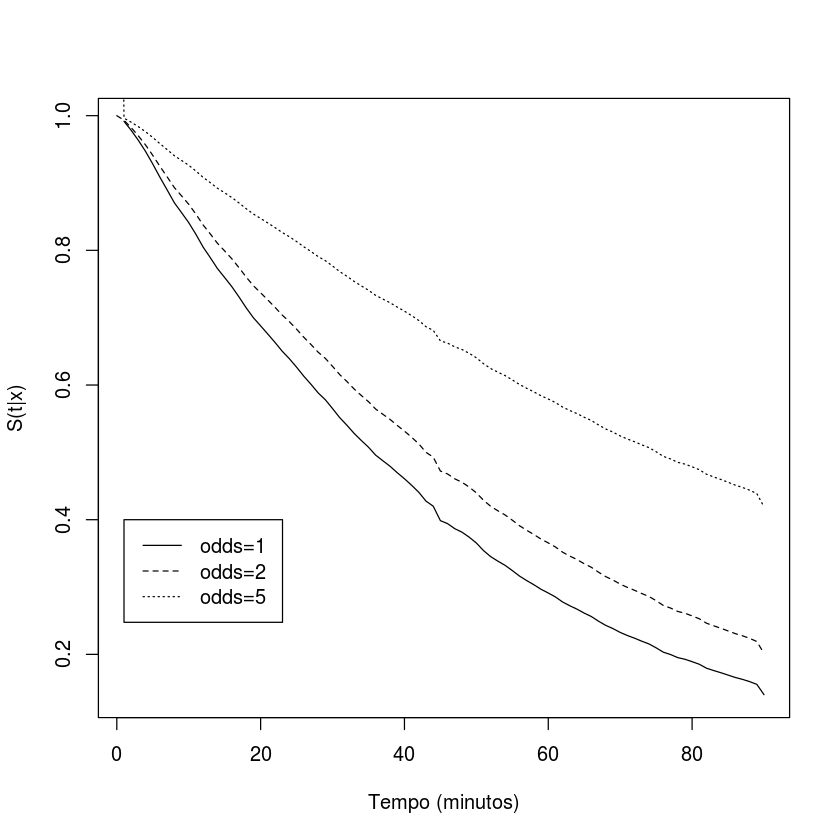

In [4]:
#desenhar gráfico
htc_casa <- basehaz(fit_casa, centered=F)
tempo_casa <- htc_casa$time
H0_casa <- htc_casa$hazard
S0_casa <- exp(-H0_casa)
S_odds1_casa <- S0_casa^exp(beta_odds_casa)
S_odds2_casa <- S0_casa^exp(beta_odds_casa*2)
S_odds5_casa <- S0_casa^exp(beta_odds_casa*5)
plot(tempo_casa, S_odds1_casa, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)")
lines(c(0, tempo_casa), c(1, S_odds2_casa), lty=2)
lines(c(0, tempo_casa), c(2, S_odds5_casa), lty=3)
legend(1, 0.4, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"))

## 4.2. Modelo "Fora" e Odds diferentes

In [5]:
#recolher dados
foot <- dbConnect(RSQLite::SQLite(), "foot.db")
data <- dbGetQuery(foot, 'SELECT tempo, (cens + equip)/2 as cens, odds FROM goal_1')
dbDisconnect(foot)
rm(foot)

In [6]:
#modelo final para "fora"
ligas <- c(rep(1,1347),rep(2,1781),rep(3,1443),rep(1,1808),rep(1,1788),rep(6,1836))
fora <- data$tempo
cens2 <- data$cens
odds2 <- as.numeric(data$odds)
rm(data)
#ajustar
fit_fora <- coxph(Surv(fora, cens2) ~ factor(ligas) + odds2, method="breslow")
beta_ligas <- fit_fora$coefficients[1]
beta_ligas
beta_odds_fora <- fit_fora$coefficients[4]
beta_odds_fora

factor(ligas)2 
    0.02244125

odds2 
0.1033905

In [7]:
#desenhar gráfico
htc_fora <- basehaz(fit_fora, centered=F)
tempo_fora <- htc_fora$time
H0 <- htc_fora$hazard
S0_fora <- exp(-H0)
S_odds1_fora <- S0_fora^exp(beta_odds_fora)
S_odds2_fora <- S0_fora^exp(beta_odds_fora*2)
S_odds5_fora <- S0_fora^exp(beta_odds_fora*5)

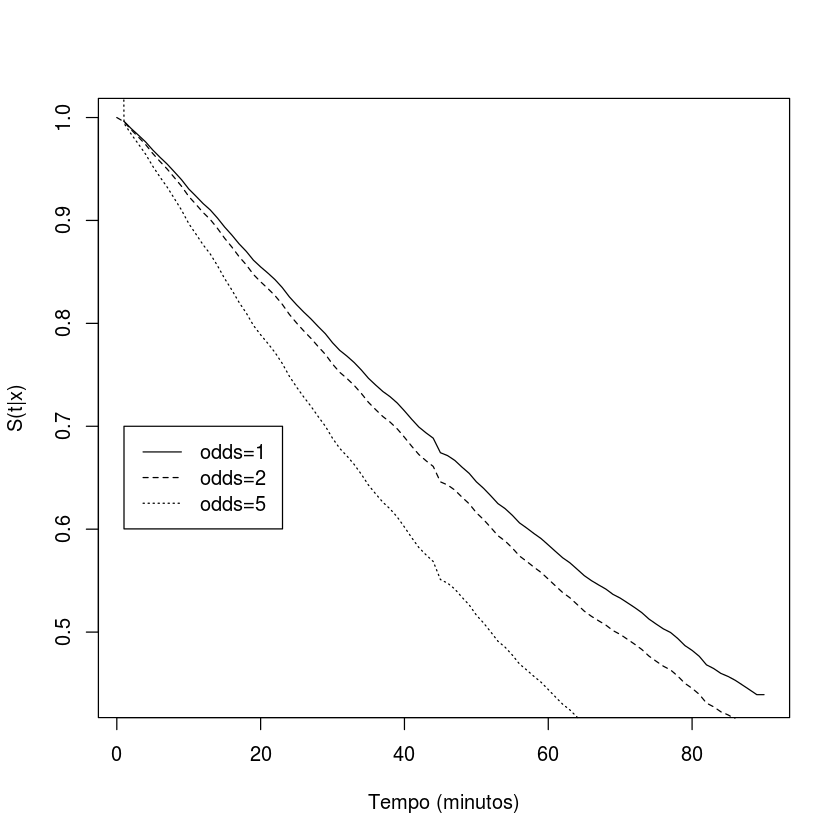

In [8]:
plot(tempo_fora, S_odds1_fora, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)")
lines(c(0, tempo_fora), c(1, S_odds2_fora), lty=2)
lines(c(0, tempo_fora), c(2, S_odds5_fora), lty=3)
legend(1, 0.7, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"))

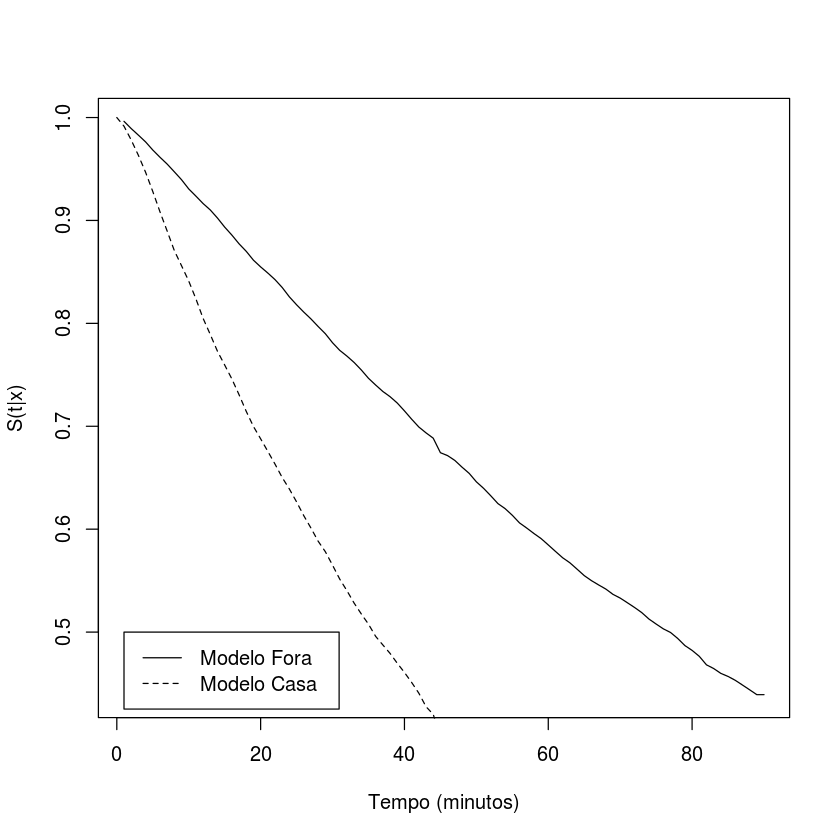

In [9]:
plot(tempo_fora, S_odds1_fora, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)")
lines(c(0, tempo_fora), c(1, S_odds1_casa), lty=2)
legend(1, 0.5, lty=c(1, 2), c("Modelo Fora", "Modelo Casa"))

## 4.3. Modelo "Casa" e liga GE

In [10]:
#recolher dados para modelo casa
foot <- dbConnect(RSQLite::SQLite(), "foot.db")
data <- dbGetQuery(foot, 'SELECT tempo, (cens + equip)%2 as cens, odds FROM goal_1')
dbDisconnect(foot)
rm(foot)
#definir variáveis
ligas <- c(rep(1,1347),rep(1,1781),rep(3,1443),rep(1,1808),rep(1,1788),rep(1,1836))
casa <- data$tempo
cens1 <- data$cens
odds1 <- as.numeric(data$odds)
rm(data)
#ajustar modelo Cox
fit_casa <- coxph(Surv(casa, cens1) ~ factor(ligas) + odds1, method="breslow")
fit_casa$coefficients
beta_ligas <-  fit_casa$coefficients[1]
beta_odds  <- fit_casa$coefficients[2]

factor(ligas)3          odds1 
     0.1082769     -0.2035418

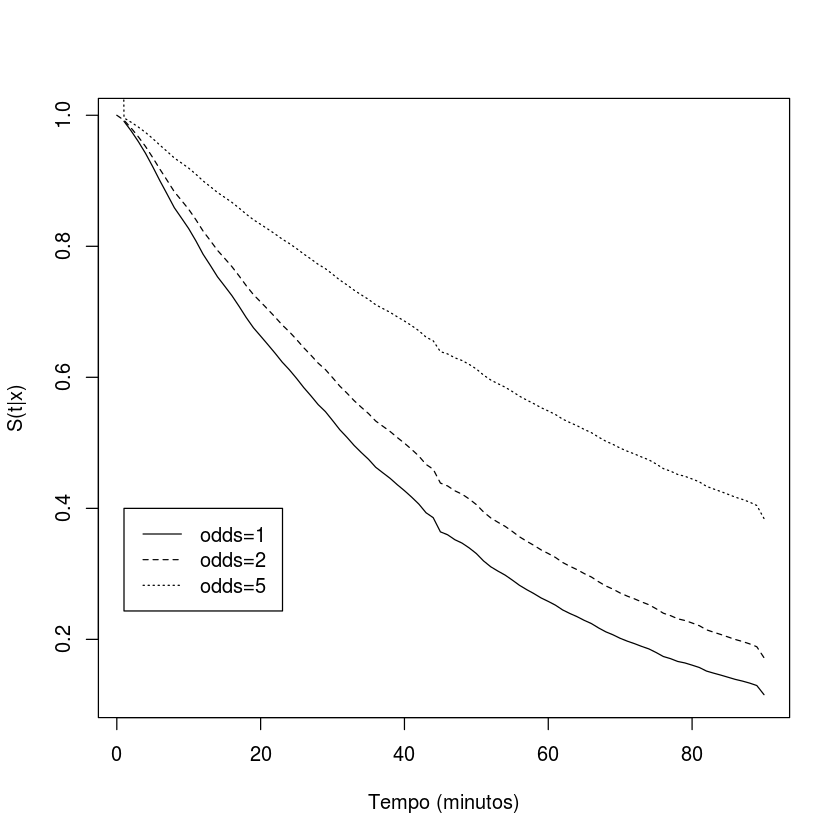

In [11]:
#desenhar gráfico
htc <- basehaz(fit_casa, centered=F)
tempo <- htc$time
H0 <- htc$hazard
S0 <- 1/exp(H0)
S1 <- S0^exp(beta_ligas + beta_odds*1)
S2 <- S0^exp(beta_ligas + beta_odds*2)
S5 <- S0^exp(beta_ligas + beta_odds*5)
plot(tempo, S1, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)")
lines(c(0, tempo), c(1, S2), lty=2)
lines(c(0, tempo), c(2, S5), lty=3)
legend(1, 0.4, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"))

## 4.4. Modelo "Fora" e liga GE

In [12]:
#recolher dados
foot <- dbConnect(RSQLite::SQLite(), "foot.db")
data <- dbGetQuery(foot, 'SELECT tempo, (cens + equip)/2 as cens, odds FROM goal_1')
dbDisconnect(foot)
rm(foot)
#definir variáveis
ligas <- c(rep(1,1347),rep(1,1781),rep(3,1443),rep(1,1808),rep(1,1788),rep(1,1836))
fora <- data$tempo
cens2 <- data$cens
odds2 <- as.numeric(data$odds)
rm(data)
#ajustar modelo Cox
fit_fora <- coxph(Surv(fora, cens2) ~ factor(ligas) + odds2, method="breslow")
fit_fora$coefficients

factor(ligas)3          odds2 
    0.09470471     0.10347061

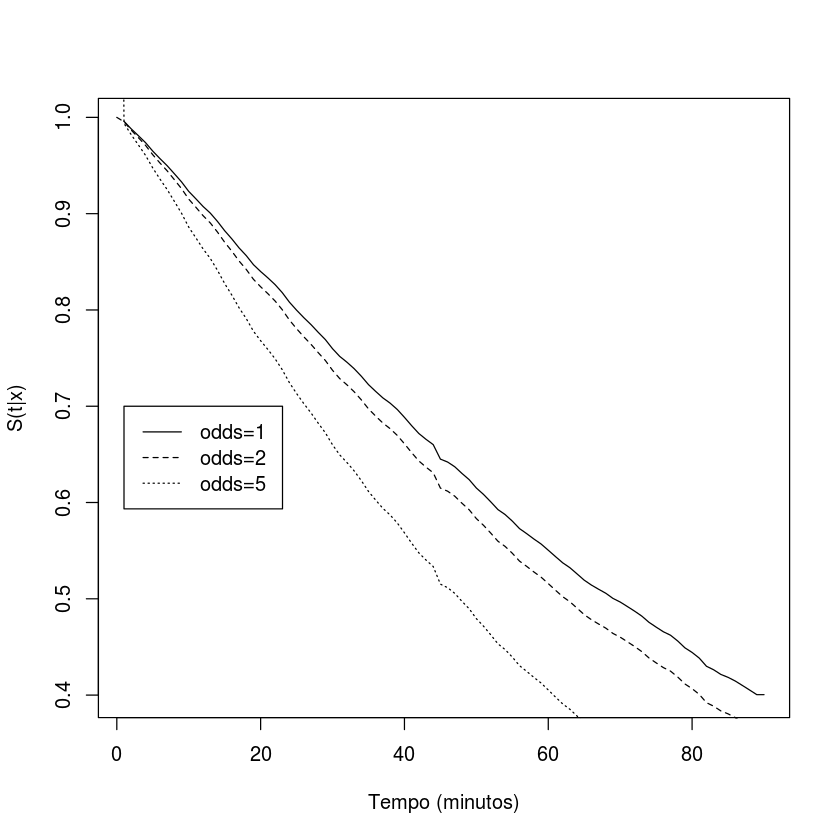

In [13]:
beta_ligas <- fit_fora$coefficients[1]
beta_odds  <- fit_fora$coefficients[2]
htc <- basehaz(fit_fora, centered=F)
tempo <- htc$time
H0 <- htc$hazard
S0 <- exp(-H0)
S1 <- S0^exp(beta_ligas + beta_odds*1)
S2 <- S0^exp(beta_ligas + beta_odds*2)
S5 <- S0^exp(beta_ligas + beta_odds*5)
plot(tempo, S1, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)")
lines(c(0, tempo), c(1, S2), lty=2)
lines(c(0, tempo), c(2, S5), lty=3)
legend(1, 0.7, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"))

## 5.1 Taxa de Falha

A taxa de falha destina-se a comparar a alteração do risco para valores diferentes dos coeficientes, considerando a mesma base para a função de risco, por exemplo com "odds"=1 vs "odds"=2

### 5.1.1. Modelo "Casa"

Para este caso temos, para a generalidade das Ligas $\beta_2 =  -0.2038$ 

pelo que podemos calcular com a fórmula:

$\displaystyle{\frac{\lambda_{odds=1}}{\lambda_{odds=2}}=\frac{\lambda_0 (t) \cdot e^{\beta_{2}}}{\lambda_0 (t) \cdot e^{\beta_{2} *2}}} = e^{-\beta_2}=e^{0.2038} = 1.226 $

### 5.1.2. Modelo "Fora"

Para este caso temos, para a generalidade das Ligas $\beta_2 =  0.10347$

pelo que podemos calcular com a fórmula:

$\displaystyle{\frac{\lambda_{odds=1}}{\lambda_{odds=2}}=\frac{\lambda_0 (t) \cdot e^{\beta_{2}}}
               {\lambda_0 (t) \cdot e^{\beta_{2} *2}}} = e^{-\beta_2}=e^{0.1034} = 1.109 $

### 5.2.1. Modelo "Casa" da liga alemã

Para este caso temos, para a generalidade das Ligas $\beta_2 =  -0.20354$ e $\beta_1 = 0.10828$

pelo que podemos calcular com a fórmula:

$\displaystyle{\frac{\lambda_{odds=1, ligas=GE}}{\lambda_{odds=2, ligas=GE}}=\frac{\lambda_0 (t) \cdot e^{\beta_1 + \beta_{2}}}
{\lambda_0 (t) \cdot e^{\beta_1 + (\beta_{2} *2)}}} = e^{-\beta_2}=e^{0.20354} = 1.2257 $

### 5.2.2. Modelo "Fora" da liga alemã

Para este caso temos, para a generalidade das Ligas $\beta_2 =  0.0947$ e $\beta_1 = 0.10347$

pelo que podemos calcular com a fórmula:

$\displaystyle{\frac{\lambda_{odds=1, ligas=GE}}{\lambda_{odds=2, ligas=GE}}=\frac{\lambda_0 (t) \cdot e^{\beta_{2}}}
{\lambda_0 (t) \cdot e^{\beta_1 + (\beta_{2} *2)}}} = e^{-\beta_2}=e^{-0.0947} = 0.9096$

# 5.2. Função da taxa de falha e função da taxa de falha acumulada


Para além da taxa de falha para casos particulares e partindo da função de sobrevivência pode-se obter a função da taxa de falha acumulada, e pela respectiva derivada a respectiva a função da taxa de falha o que corresponde a:

$\Lambda (t) = \int_0^t \lambda (u) du = - ln (S(t))$

para a taxa de falha acumulada e

$\Lambda' (t) = [- ln(S(t))]'$ 

para a função da taxa de falha.

No caso do modelo "casa" obtemos o gráfico da função da taxa de falha:

### 5.2.1. Modelo "casa": taxa de falha e taxa de falha acumulada

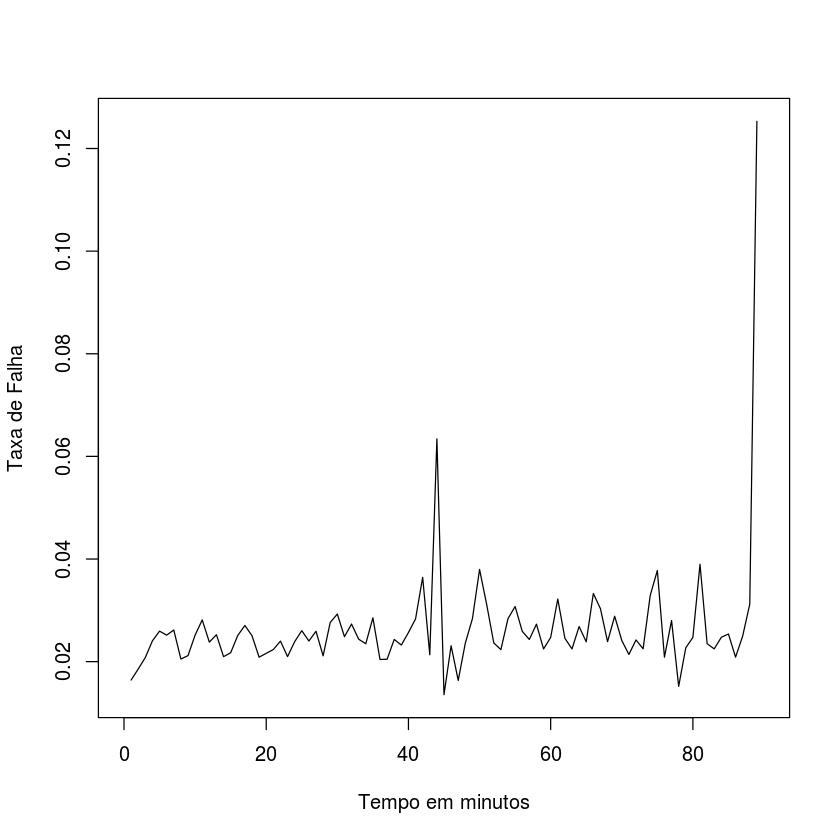

In [30]:
Ht<-basehaz(fit_casa,centered=F)
l0=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_casa[1:length(tempo_casa)-1],l0,lty=1,type="l",
     xlim=range(c(0,max(tempo_casa))),xlab="Tempo em minutos",ylab="Taxa de Falha")

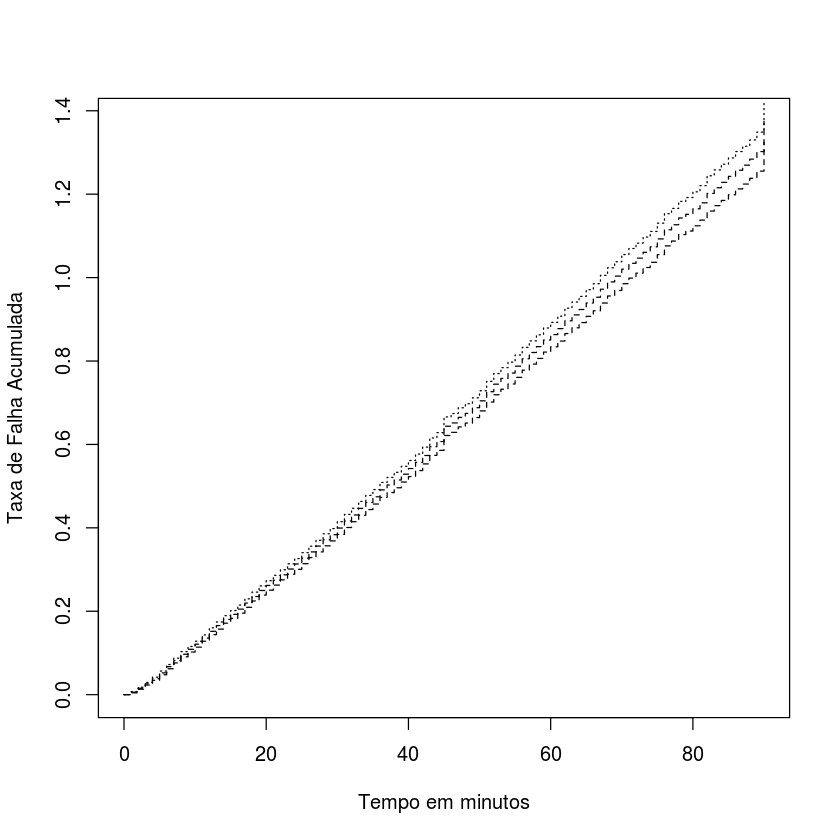

In [15]:
surv2 <- survfit(fit_casa)
plot(surv2, lty=2:3, fun="cumhaz", xlab="Tempo em minutos", ylab="Taxa de Falha Acumulada")
#surv2 <- survfit(fit_casa)
#haz <- c(1-head(summary(surv2))["surv"]$surv, 1)
#for(i in 1:89) {rate[i] = haz[i+1]-haz[i]}
#plot(rate, lty=1, type="l", xlab="minutos", xlim=range(c(0,90)), ylab="Taxa de Falha")

### 5.2.2. Modelo "fora": taxa de falha e taxa de falha acumulada

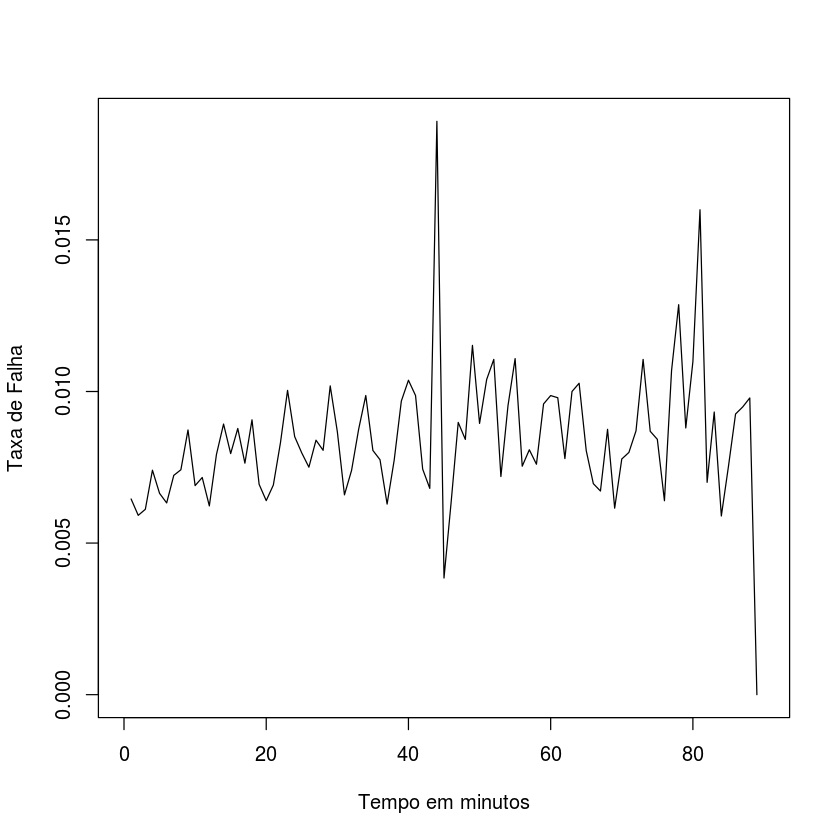

In [16]:
Ht<-basehaz(fit_fora,centered=F)
l1=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_fora[1:length(tempo_fora)-1],l1,lty=1,type="l",
     xlim=range(c(0,max(tempo_fora))),xlab="Tempo em minutos",ylab="Taxa de Falha")

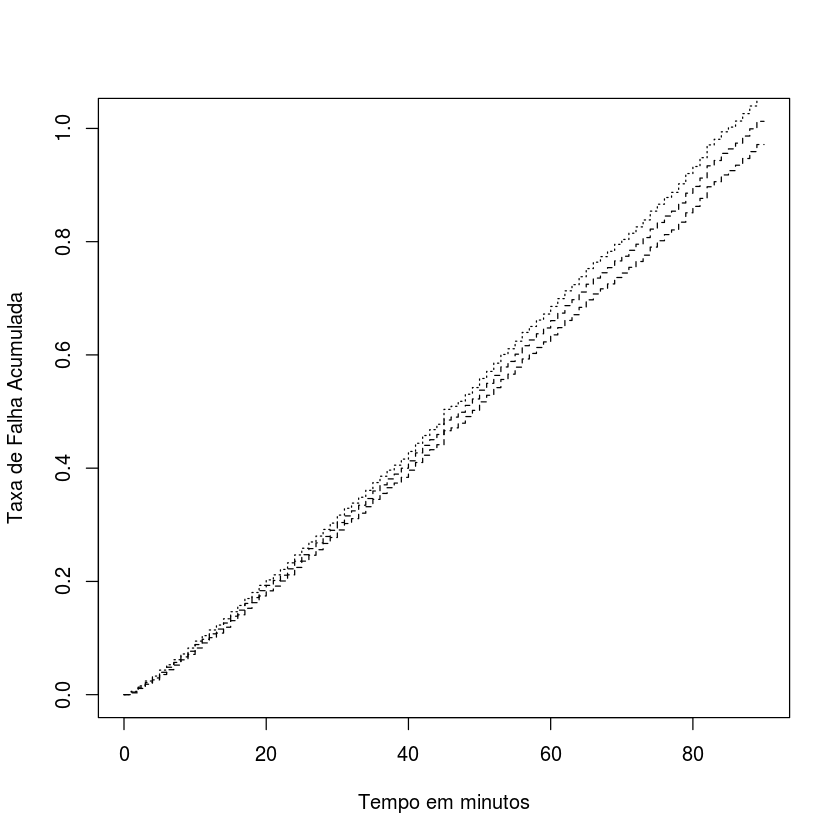

In [17]:
surv2 <- survfit(fit_fora)
plot(surv2, lty=2:3, fun="cumhaz", xlab="Tempo em minutos", ylab="Taxa de Falha Acumulada")

## Gráfico de Comparação da Taxa de Falha para o modelo "casa" e modelo "fora"

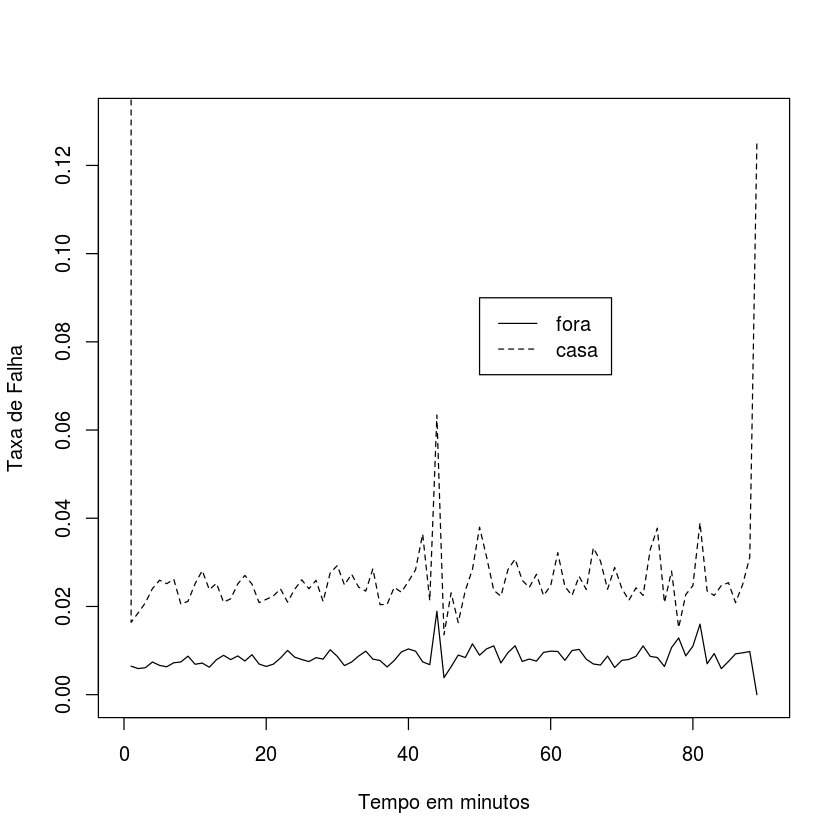

In [42]:
plot(tempo_fora[1:length(tempo_fora)-1],l1,lty=1,type="l", ylim=range(c(0,max(0.13))),
     xlim=range(c(0,max(tempo_fora))),xlab="Tempo em minutos",ylab="Taxa de Falha");
lines(c(1, tempo_casa[1:length(tempo_casa)-1]), c(1, l0), lty=2);
legend(50, 0.09, lty=c(1, 2), c("fora", "casa"));